In [257]:
import numpy as np
import multiprocessing
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from time import time
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

from sklearn.cluster import DBSCAN
import seaborn as sns
from matplotlib.colors import ListedColormap
from numpy.random import choice
from umap import UMAP

sns.set_style("darkgrid")
%matplotlib inline

In [3]:
w2v_model = Word2Vec.load("news_word2vec.model")

In [11]:
news=pd.read_csv('news.csv')
news=news.drop(['Unnamed: 0'],axis=1)
news.columns

Index(['header', 'date', 'news'], dtype='object')

In [12]:
text=news.values[:,2]

In [13]:
def processText(data):
    tokens=[]
    for line in data:
        newToken=text_to_word_sequence(line,filters='!"#$%&amp;()*+,-./:;&lt;=>?@[\\]^_`{|}~\t\n\ufeff',
                                  lower=True,split=' ')
        tokens.append(newToken)
    return tokens

In [14]:
tokens=processText(text)
print(tokens[1])

['в', 'среду', '22', 'мая', 'в', '12', '00', 'в', 'окдц', 'по', 'адресу', 'пушкинская', '127', 'врач', 'ревматолог', 'первой', 'категории', 'ольга', 'агуреева', 'проведет', 'школу', 'для', 'пациентов', '«профилактика', 'остеоартроза»', 'остеоартроз', 'распространённая', 'форма', 'заболевания', 'суставов', 'причина', 'которого', 'поражение', 'хрящевой', 'ткани', 'суставных', 'поверхностей', 'симптомы', 'заболевания', 'боли', 'или', 'неприятные', 'ощущения', 'в', 'суставах', 'и', 'снижение', 'их', 'подвижности', 'которые', 'мешают', 'заниматься', 'привычными', 'делами', 'факторы', 'риска', 'остеоартроза', 'наследственная', 'предрасположенность', 'и', 'избыточная', 'масса', 'тела', 'очень', 'важно', 'как', 'можно', 'раньше', 'поставить', 'диагноз', 'и', 'назначить', 'необходимую', 'терапию', 'как', 'предупреждать', 'эту', 'болезнь', 'и', 'бороться', 'с', 'ней', 'расскажет', 'доктор', 'ольга', 'агуреева', 'на', 'бесплатном', 'занятии', 'в', 'окдц', 'в', 'арсенале', 'врачей', 'окдц', '–', '

## Кластеризация

In [20]:
avg_text=np.zeros((len(tokens),300))
for i,line in enumerate(tokens):
    temp=[w2v_model.wv[word] for word in line]
    mean=sum(temp)/len(temp)
    avg_text[i]=mean


In [32]:
umap_news=UMAP()
umaped_vct=umap_news.fit_transform(avg_text)

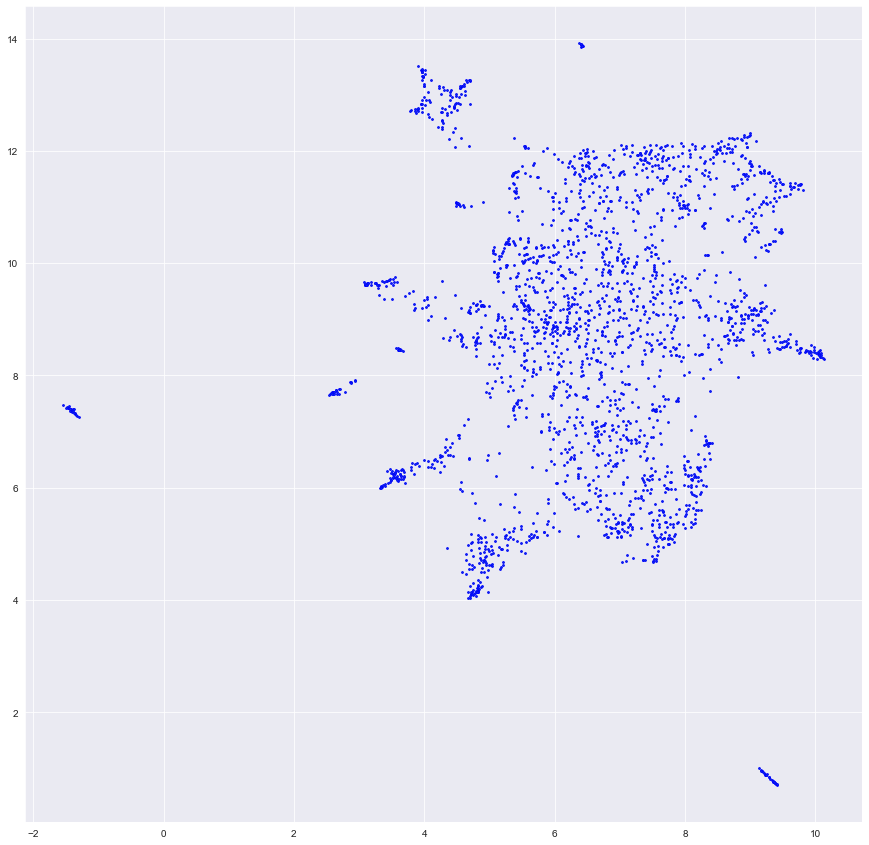

In [33]:
N=15
fig, ax = plt.subplots(figsize=(N,N))
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], edgecolor='b', s=3)
plt.show()

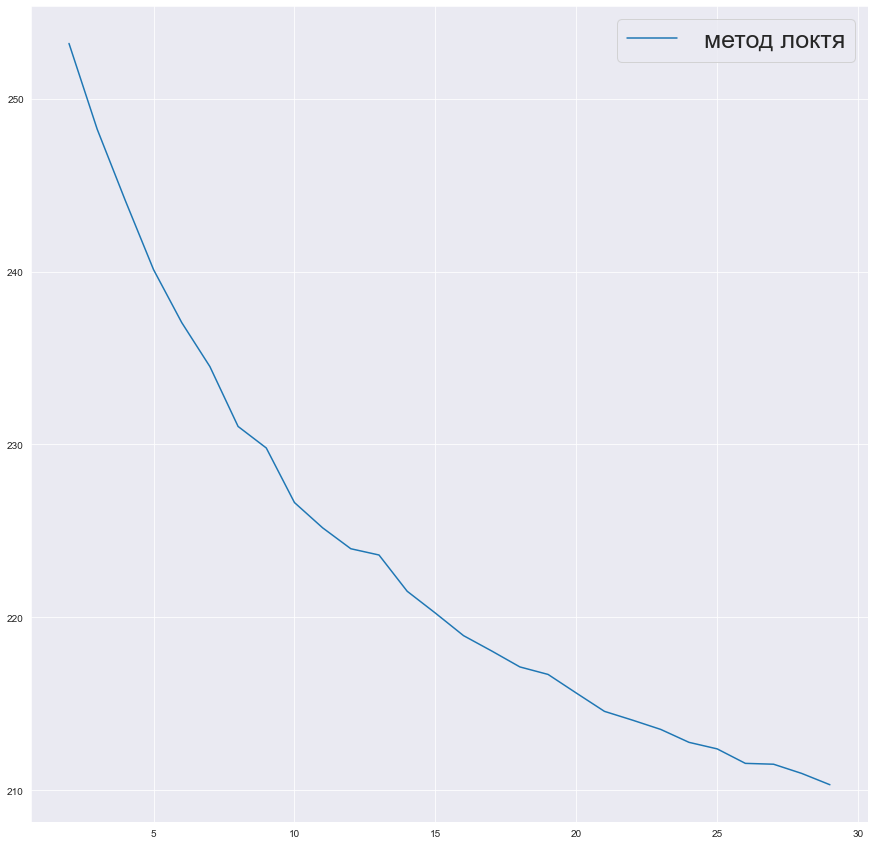

In [248]:
crit = []

x=range(2,30)
for k in x:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(avg_text)
    crit.append(np.sqrt(kmeans.inertia_))

N=15
plt.figure(figsize=(N,N))
plt.plot(x,crit)
plt.legend([' метод локтя'],fontsize=25)
plt.show()

количество кластеров  5


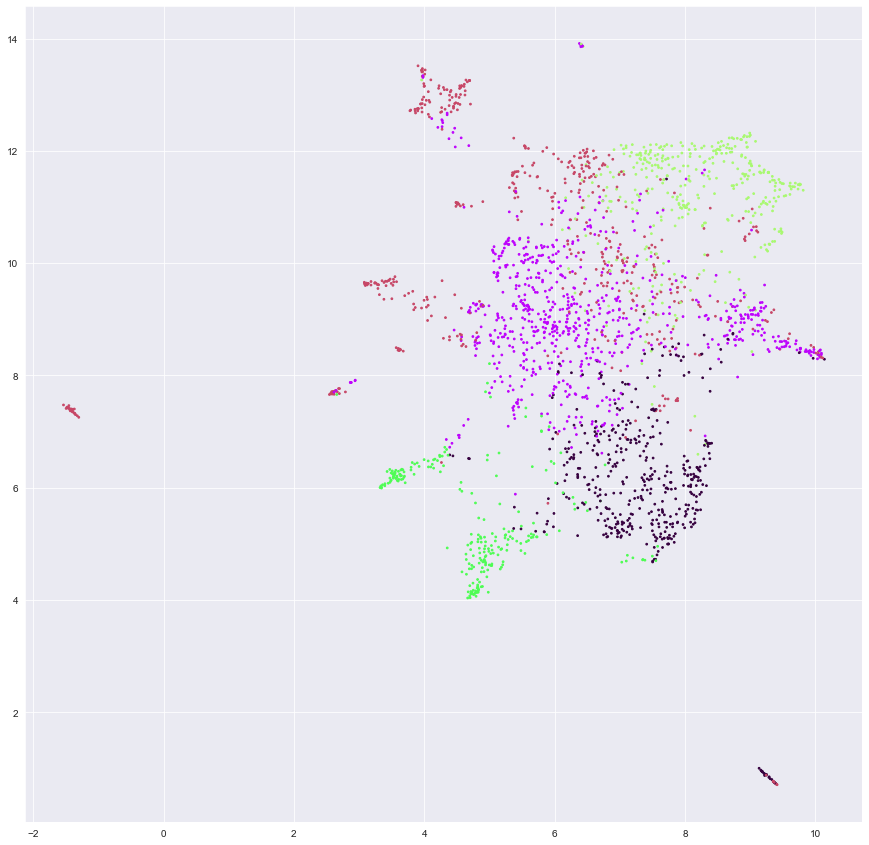

In [129]:

km_clustering = KMeans(n_clusters=5)
db_clusters = km_clustering.fit_predict(avg_text)

myclr=ListedColormap(choice(list(sns.xkcd_rgb.values()), max(db_clusters)+1)) # Генерируем контрастную карту цветов.
print('количество кластеров ',max(db_clusters)+1)
N=15
fig, ax = plt.subplots(figsize=(N,N))
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], s=3, c=db_clusters, cmap=myclr)
plt.show()

In [258]:
davies_bouldin_score(avg_text,db_clusters)

3.1365986413602096

In [58]:
text_clusters=[]
for i,cluster in enumerate(set(db_clusters)):
    text_clusters.append([])
    for j,current_cluster in enumerate(db_clusters):
        if cluster==current_cluster:
            text_clusters[i].append(text[j])
    

In [110]:
# кластер 4 непонятно
# кластер 3 про убийства и грабежи
# кластер 2  про пожары
# кластер 1 про спорт и церемонии/выступления
# кластер 0 про денги и маркетинг

for txt in text_clusters[1][:20]:
    print(txt)
    print('-----------')

Хоккейный клуб "Ростов" выиграл первый матч в сезоне, обыграв саратовский "Кристалл" в овертайме. Игра была очень сложной.Матч проходил в Саратове. Первый период матча с хозяевами площадки ростовчане выиграли по всем показателям. Правда, забить не получалось. Во втором периоде хозяева сумели переломить ход матча. Им даже удалось забить, а потом забить еще раз.Третий период прошел в равной борьбе. И саратовцы снова забили. Счет на табло был не самым приятным для ростовчан - 3:0. На 55 минуте "Ростов" отыграл одну шайбу (автор гола - Константин Орешкин), а после - еще одну (отличился Сергей Чистяков). На 57ой минуте у "Кристалла" был удален защитник, "кондоры" реализовали большинство (Алексей Савинов) и игра, по сути, началась сначала.Все решилось в овертайме - Алексей Алтухов нашел момент для броска и бросил точно в ближний угол. Ответный матч с саратовским "Кристаллом" состоится сегодня в 17 часов.
-----------
Стартовала продажа билетов на первый домашний матч «Ростова» в новом футболь

## Классификация 

In [112]:
class1 = news[news.news.str.contains("матч")]['news'].values
class2 = news[news.news.str.contains("пожар")]['news'].values
class1_tokens=processText(class1)
class2_tokens=processText(class2)
print('class 1 ',len(class1),' samples')
print('class 2 ',len(class2),' samples')

class 1  123  samples
class 2  143  samples


In [221]:
x=[]
y=[]
for i,line in enumerate(class1_tokens):
    temp=[w2v_model.wv[word] for word in line]
    mean=sum(temp)/len(temp)
    x.append(mean)
    y.append(0)
    
for i,line in enumerate(class2_tokens):
    temp=[w2v_model.wv[word] for word in line]
    mean=sum(temp)/len(temp)
    x.append(mean)
    y.append(1)
    
x=np.array(x).reshape((-1,300))
y=np.array(y).reshape((-1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [228]:
logreg = LogisticRegression()
res=logreg.fit(x_train, y_train)


## Проверка модели

In [227]:
predict_train=logreg.predict(x_train)
predict_test=logreg.predict(x_test)

train_score=f1_score(predict_train,y_train)
test_score=f1_score(predict_test,y_test)

print('train f1 ',train_score)
print('test f1 ',test_score)

train f1  1.0
test f1  0.9879518072289156


In [237]:
cm_train=confusion_matrix(y_train,predict_train,normalize='true')
cm_test=confusion_matrix(y_test,predict_test,normalize='true')
print('True positive    False positive \nFalse negative     True negative\n')
print('матрица ошибок train\n',cm_train)
print('матрица ошибок test\n',cm_test)

True positive    False positive 
False negative     True negative

матрица ошибок train
 [[1. 0.]
 [0. 1.]]
матрица ошибок test
 [[1.         0.        ]
 [0.02380952 0.97619048]]
